## This notebook will give an conceptual view of a graph with weights based on delays, where the min-cut algorithm is applied. 

In [51]:
import matplotlib.pyplot as plt
import networkx as nx
from random import *

G = nx.DiGraph()

# position of the nodes 
v1 = (1,2)
v2 = (3,3)
v3 = (2,1)
v4 = (4,1)
v5 = (5,3)

# dict of node names 
node_names = {v1: 'v1', v2: 'v2', v3: 'v3', v4: 'v4', v5: 'v5'}

# create two routes back and forth with a random weight assigned between 1-10
route1 = [(v1, v2, randint(1,10)), (v2, v3, randint(1,10)), (v3, v1, randint(1,10)), (v2, v1, randint(1,10)), (v3, v2, randint(1,10)), (v1, v3, randint(1,10))]
route2 = [(v4, v3, randint(1,10)), (v3, v5, randint(1,10)), (v5, v4, randint(1,10)), (v3, v4, randint(1,10)), (v5, v3, randint(1,10)), (v4, v5, randint(1,10))]


G.add_weighted_edges_from(route1) # line 1
G.add_weighted_edges_from(route2) # line 2

pos = nx.spring_layout(G)  # positions for all nodes

Lets stop and think about what a weight mean in terms of delays. This network should be seen as weighted flow network where the flow through the edge is determined by historical delays. If we want to detect edges which usually have a lot of delays by using the min-cut algorithm, we need to have the following logic "a lot of delays => reduced flow => low weight".

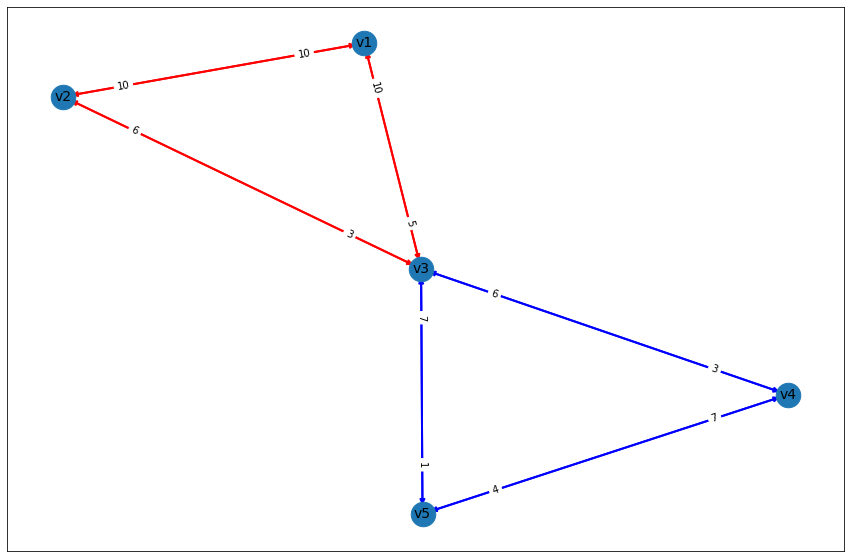

In [48]:
# Draw the graph 

# nodes
nx.draw_networkx_nodes(G, pos, node_size=600)

# edges based on routes
nx.draw_networkx_edges(G, pos, edgelist=route1,
                       width=2, edge_color='r')
nx.draw_networkx_edges(G, pos, edgelist=route2,
                       width=2, edge_color='b')

# node labels
nx.draw_networkx_labels(G, pos, font_size=14, labels=node_names )

# adding edge labels as weights
nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'weight'), label_pos=0.8)

#show bigger plot
plt.show()
plt.rcParams["figure.figsize"] = (15,10)

Imagine this graph as a small public transportation network with 5 stations represented as nodes and a blue and a red bus-line. The edges are directed in both directions, and the number close to each node represent the weight on the outgoing direction from that node. 

#### Say that our objective now is to find out the flow situation between v5 and v1. 

Paths from v5 to v1: 

1. {v5, v3, v1}
2. {v5, v3, v2, v1}
3. {v5, v4, v3, v1}
4. {v5, v4, v3, v2, v1}

We know that the cut will isolated v5 from v1 by making a cut over the edges where the sum of the weights are smallest. 

It is hard to figure this out just by observing the graph even for a small graph like this, but a good guess could be that the cut will go over the 2 blue lines that connects v3 with with v4 and v5. That would isolate v5 from v1 and value of the cut would be 4 (3+1).

In [50]:
#applying the min-cut algorithm to the graph G with defined source (v1) and sink (v10)
nx.minimum_cut(G, v5, v1, capacity = 'weight')

(4, ({(4, 1), (5, 3)}, {(1, 2), (2, 1), (3, 3)}))

By applying the min-cut alogrithm we see that the guess was correct. The output from the function gives the value of the cut = 4, and two partiontions of nodes. Partition1 includes v5=(5,3) and v4=(4,1) and partition2 inlcudes the rest of the nodes. 

### So what will the cut actually give us? 

In this example, we are using a source and a sink as terminal nodes. The cut will give the following information: 
* The maximum amount of flow that can be sent from the source (v5) to the sink (v1)
* Which nodes that are separated from each other

Let think about what conclusions we can make from this in our context
* The information about the maximum amount of flow that can be sent from source to sink is only intresting if the initial value reflects the reality. However, to figure out the flow in reality on each edge has not been our main focus unitl this point.
* The other information we get is which nodes that are separeated from each other in the cut. This might be more interesting. Lets look at an example how this could be applied. 

### CASE: 

Imagine that you a traffic planner that recive intel on that people travaleling from A to B are often delayed, which mean that the travelers miss their connections and have to take taxis instead. Your mission is to find out what is going on and figure out how to fix it. 

### RESULT: 

By using this tool (where the min-cut algorithm is applied) i can easily find the bottlenecks in terms of delays on the paths from A to B by looking the edges where the cut is made. I can then bring this information into my own reality as a traffic planner and try to find the reason for the delays and see if any actions can be made to prevent them. 